# Heart Disease Prediction

**Aim:** To predict Heart disease based on various attributes using **_Neural Networks_**.

<br>

**Data Attributes:**
- `age` : *Age in years*
- `sex` : *0=female, 1=male*
- `cp` : *Chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic)*
- `trestbps` : *Resting blood pressure (in mm Hg on admission to hospital)*
- `chol` : *Serum Cholesterol in mg/dl*
- `fbs` : *Fasting blood sugar >120 mg/dl (0=false, 1=true)*
- `restecg` : *Resting electrographic results (0=normal, 1=having ST-T wave abnormality, 2=left ventricular hypertrophy)*
- `thalach` : *Maximum heart rate*
- `exang` : *Exercise induced angina*
- `oldpeak` : *ST depression induced by exercise relative to rest*
- `slope` : *Slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)*
- `ca` : *Number of blood vessels colored by fluoroscopy*
- `thal` : *A blood disorder called thalassemia (3=normal, 6=fixed defect, 7=reversible effect)*
- `num` : *Class (0=healthy, 1,2,3,4=have heart disease)*

<br>

**Content:**
1. Importing Libraries
2. Exploratory Data Analysis
3. Data Visualization
4. Creating Training and Testing Data
5. Building and Training The Neural Network
  - 5.1  Categorical Model
  - 5.2 Binary model
6. Results and Metrics
  - 6.1  Categorical Model
  - 6.2 Binary model

## 1. Importhing Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 2. Exploratory Data Analysis

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(url, names=col_names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


- From the known information we know that the data only contains numeric columns and thus the columns `ca` and `thal` may have missing/wrong data in them since the datatyoe of these columns is object.
- From the definition of the columns we know they have discrete values.

In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

- Both the columns have `?` as a data point.
- We first convert all the data points having `?` to NaN value and the drop the rows which contain NaN values.

In [9]:
df = df.replace('?', np.nan).dropna(axis=0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [10]:
df.shape

(297, 14)

In [11]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


- Though the data didn't have any null values, it **contained missing values** which were taken care off by droping the rows containing missing values.
- After cleaning the data we are left with **297 instances**.
- The average age of patients is above **54.5 yrs** meaning that a decent amount of paitents are Senior citizens.
- From the table we can also se that the minimun, average and maximum values of each column have a lot of variation insisting us to **normalize** or **standardize** the data  

## 3. Data Visualization

In [13]:
plt.style.use('fivethirtyeight')

In [14]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 4:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :', categorical_features)
print('Numerical Features :', numerical_features)

Categorical Features : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Numerical Features : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']


- Here, the categorical features are defined if the attribute has less than or equal to 4 unique elements from the definitions of the columns.

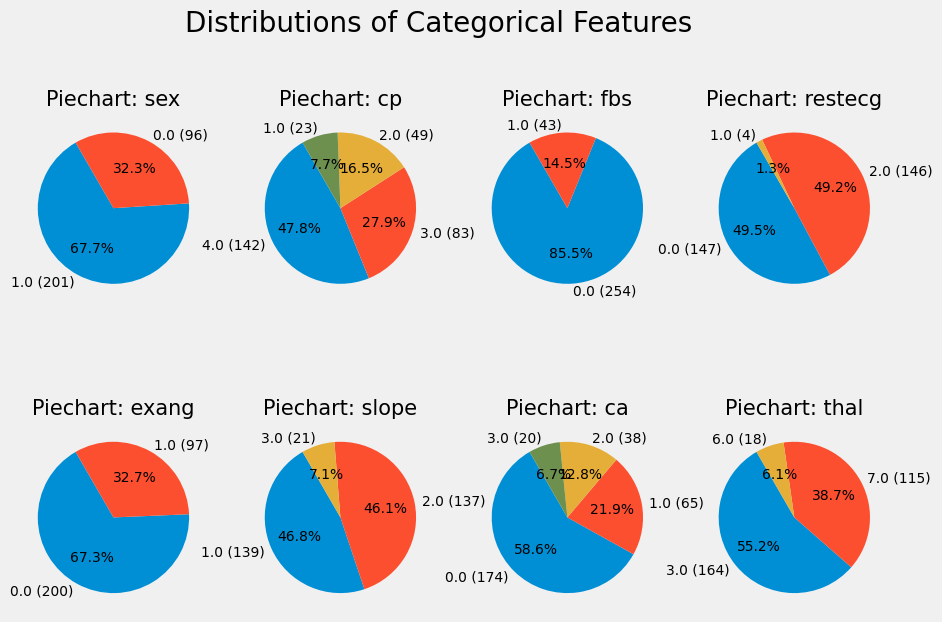

In [15]:
fig, axs = plt.subplots(2, 4, figsize=(10, 7))
fig.suptitle('Distributions of Categorical Features', fontsize=20)

for i, feature in enumerate(categorical_features):
  row, col = divmod(i, 4)
  count = df[feature].value_counts()
  label = [f'{name} ({cnt})' for name, cnt in count.items()]

  axs[row, col].pie(count, labels=label, autopct='%1.1f%%', startangle=120, textprops={'fontsize': 10})
  axs[row, col].set_title(f'Piechart: {feature}', fontsize=15)

plt.show()

- From the Pie chart we can conclude that only **one-third** are **females** and the majority is of male patients.
- Most of the patients have asymptomatic type of chest pain, fasting blood sugar greater than 120 mg/dl, exercise induced angina and normal thalassemia.

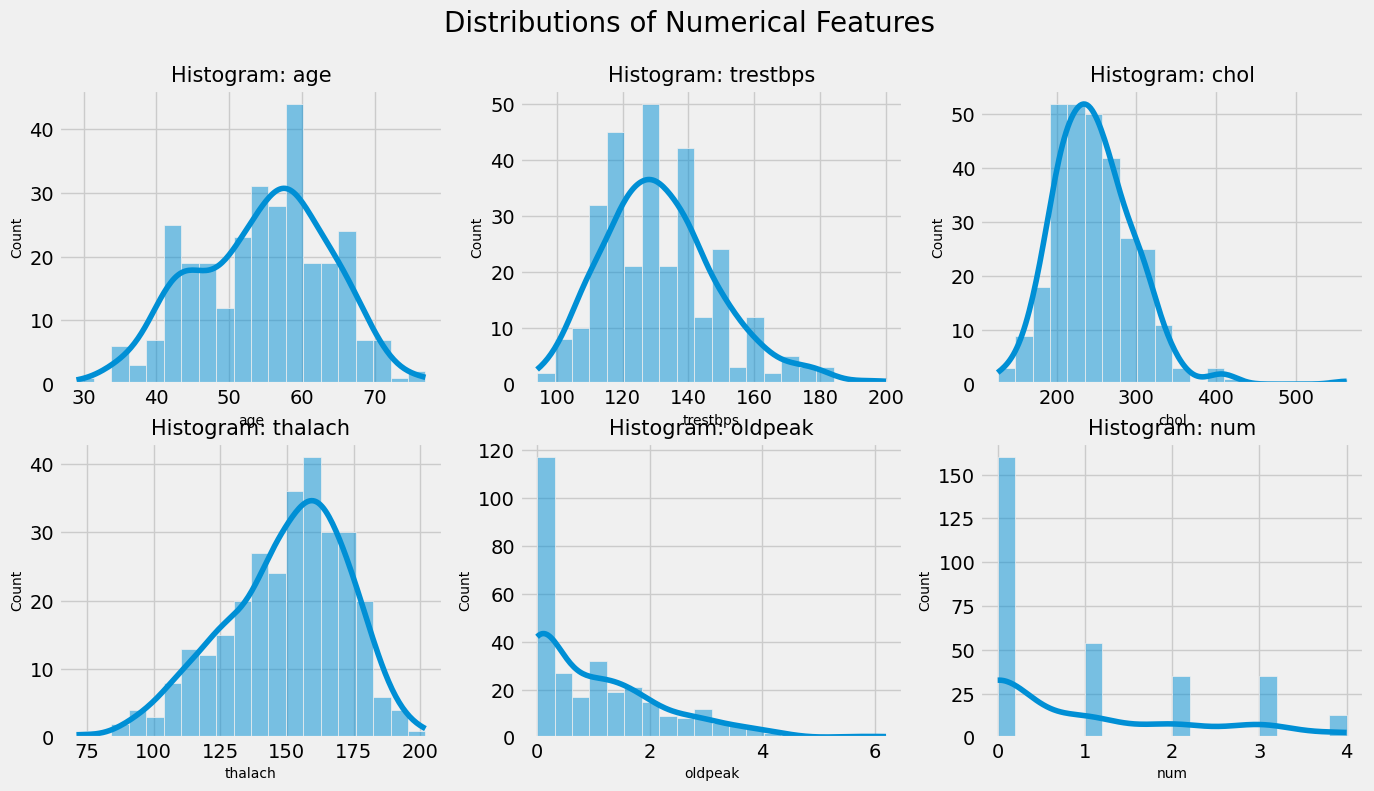

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Distributions of Numerical Features', fontsize=20)

for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 3)

    sns.histplot(df[feature], bins=20, kde=True, ax=axs[row, col])
    axs[row, col].set_title(f"Histogram: {feature}", fontsize=15)
    axs[row, col].set_xlabel(feature, fontsize=10)
    axs[row, col].set_ylabel("Count", fontsize=10)

plt.show()

- The distribution of trestbps and chol are positively skewed whereas that of age and thalach are negatively skewed.
- The distribution of oldpeak and the target column, num are inversely related to their count.

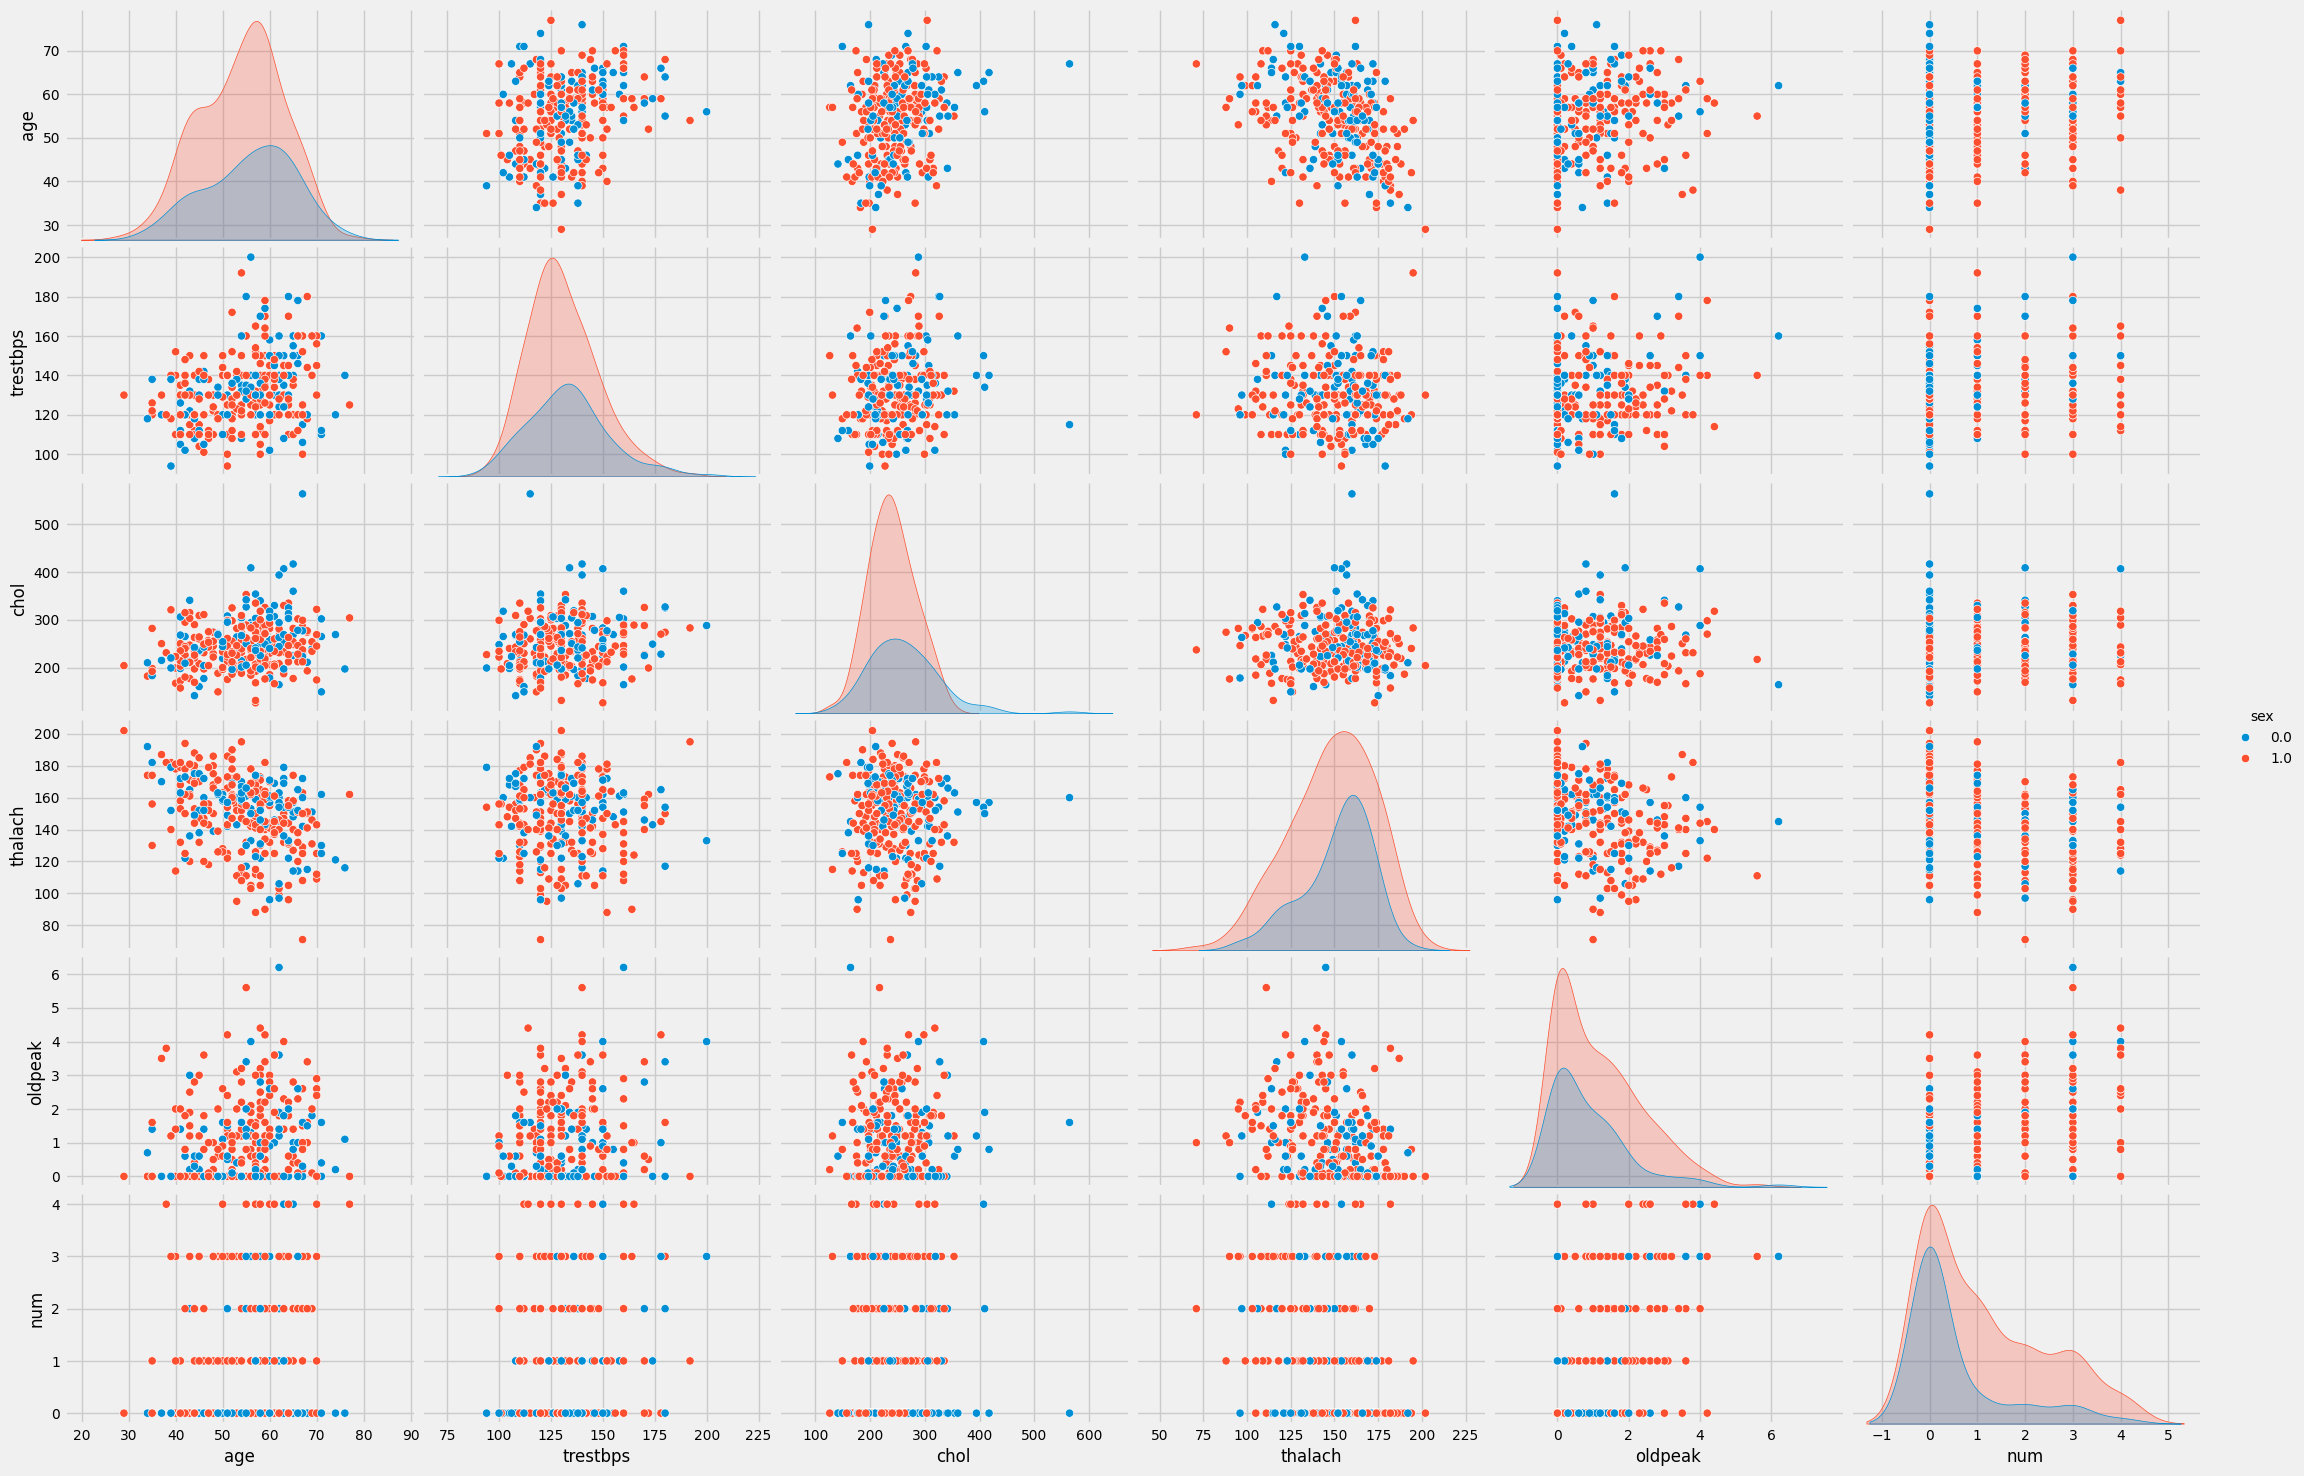

In [19]:
plt.rcParams.update({'font.size': 10})
sns.pairplot(df[numerical_features + ['sex']], hue='sex', aspect=1.5)
plt.show()

- From the above pair plot we conclude that sex has no direct relation with the other features and thus we can treat sex as an independent column.

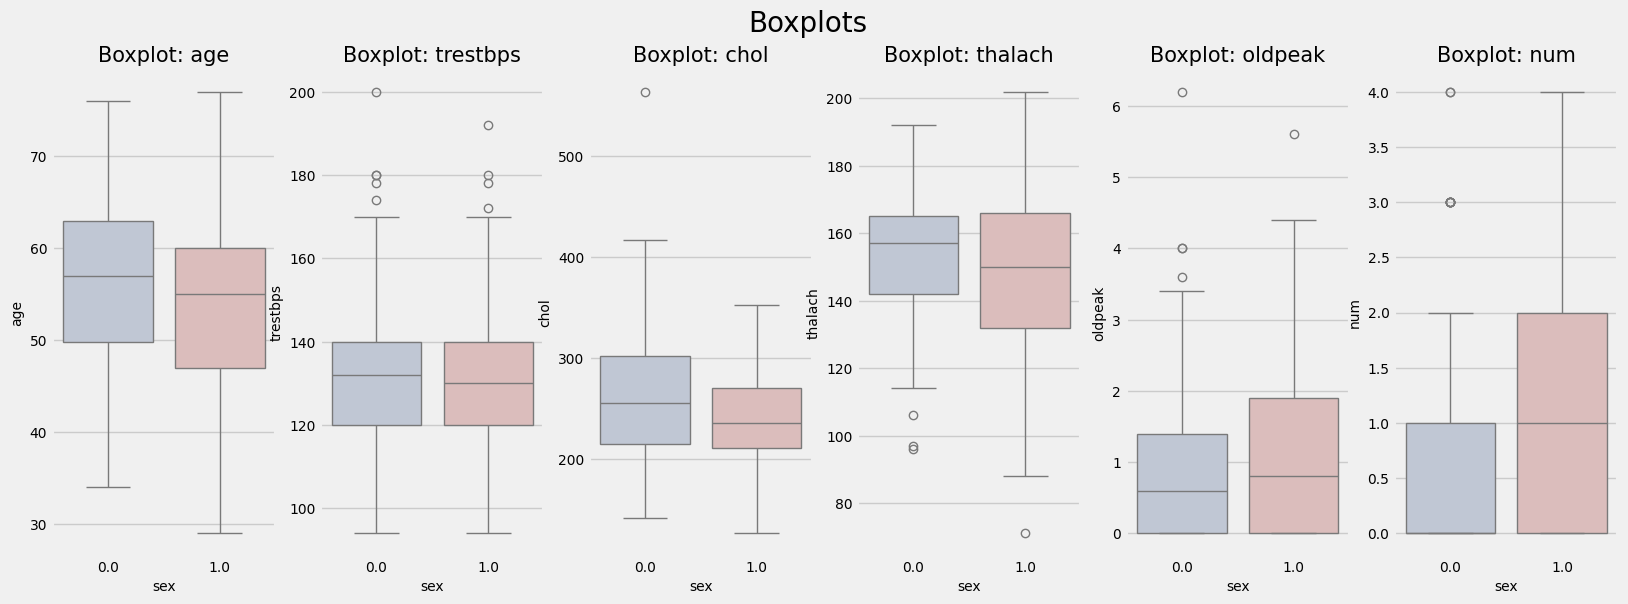

In [21]:
fig, axs = plt.subplots(1, len(numerical_features), figsize=(18, 6), sharex=True)
fig.subplots_adjust(hspace=0.5)

fig.suptitle('Boxplots', fontsize=20)


for i, col in enumerate(numerical_features):
    sns.boxplot(x='sex', y=col, data=df, palette='vlag', ax=axs[i])
    axs[i].set_xlabel('sex', fontsize=10)
    axs[i].set_ylabel(col, fontsize=10)
    axs[i].set_title(f'Boxplot: {col}', fontsize=15)

plt.show()

- From the boxplot of age we can infer that males patient may experience heart disease from the age of 30 wheareas it is roughly 35 for female patient.
- trestbps doesn't vary much with sex.
- Female patient have higher values of chol(serum cholesterol) than that of male patient.
- for the other plots we can say that male patients have a higher range of thalach(heart rate) and oldpeak.

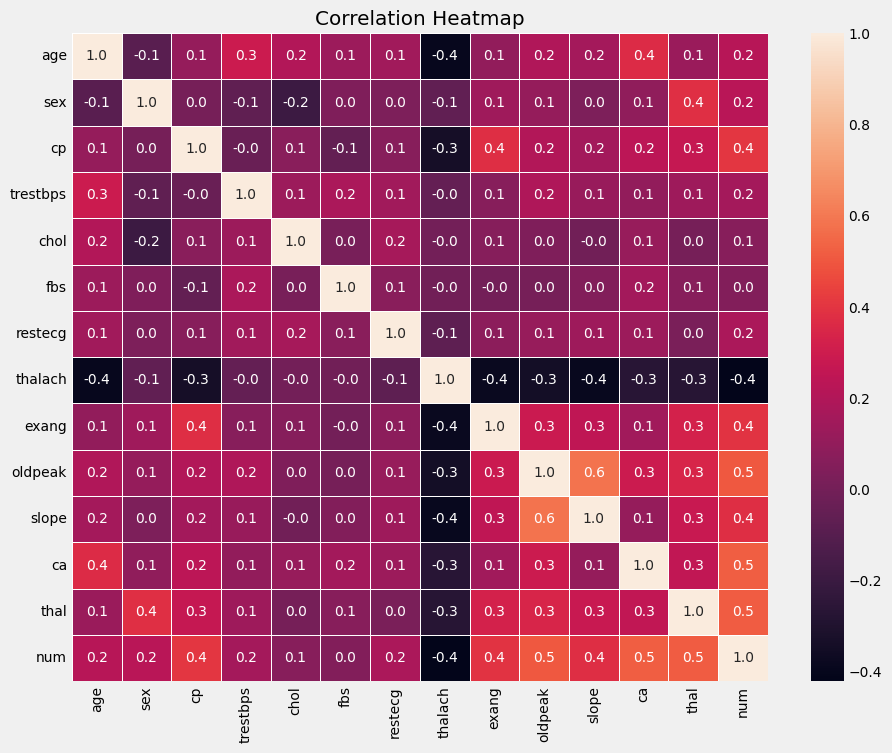

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

- thalach is negatively correlated with most of the columns.
- cp, oldpeak, ca and thal are postitively correlated with the traget column, num.

## 4. Creating Training and Testing dataset

- Now that we have taken care of the missing values and visualized the data, we can proceed further with creating the training and testing datasets using train_test_split function into **80:20 ratio**.

In [23]:
X = np.array(df.drop(['num'], axis=1))
y = np.array(df['num'])

In [24]:
# Standardizing the data
mean = X.mean(axis=0)
X -= mean

std = X.std(axis=0)
X /= std

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

## 5. Building and Training the Neural Network

- With successful train and test split we can move ahead and build the Neural Network. Using keras we define a Neural Netwoek will have a one input layer, **one hidden layer** and an output layer.
- And Since this is a classification problem we will use a **softmax activation function** in the output layer and a **categorical_crossentropy loss** during our training phase.

#### 5.1 Categorical Model

In [26]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
Y_train.shape

(237, 5)

In [27]:
def create_categorical_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [28]:
model = create_categorical_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=10, verbose=1)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 1.6045 - accuracy: 0.4430
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5887 - accuracy: 0.5401
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5744 - accuracy: 0.5401
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5576 - accuracy: 0.5401
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5370 - accuracy: 0.5401
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 1.5069 - accuracy: 0.5401
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 1.4659 - accuracy: 0.5401
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 1.4067 - accuracy: 0.5401
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 1.3390 - accuracy: 0.5401
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 1.2651 - accuracy: 0.5401
Epoch 11/

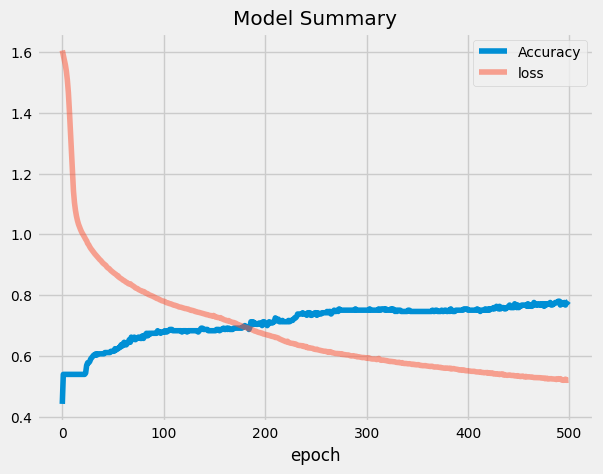

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'], alpha=0.5)
plt.title('Model Summary')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'loss'])
plt.show()

- Though we have quite convincing results the loss is still significant.

#### 5.2 Binary Model

- The high loss in the Categorical approach could be because it is very difficult to distinguish between the different severity levels of heart disease(target column has 0 for a healthy heart and class 1-4 for a heart disease).
- We can reduce the loss by converting the problem into a binary problem i.e, does the patient have a heart disease or not.

In [31]:
Y_train_b = y_train.copy()
Y_test_b = y_test.copy()

Y_train_b[Y_train_b > 0] = 1
Y_test_b[Y_test_b > 0] = 1

In [32]:
def create_binary_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [33]:
binary_model = create_binary_model()
binary_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
history_b = binary_model.fit(X_train, Y_train_b, epochs=500, batch_size=10, verbose = 1)

Epoch 1/500
24/24 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5105
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5401
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5401
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.5401
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.5401
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.5401
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.5401
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7384
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8143
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.8312
Epoch 11/

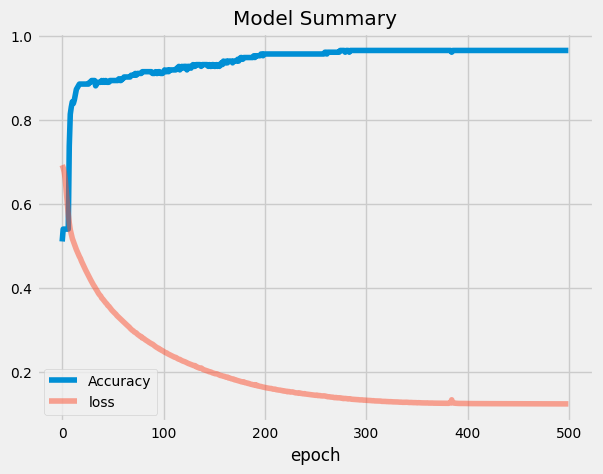

In [35]:
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['loss'], alpha=0.5)
plt.title('Model Summary')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'loss'])
plt.show()

## 6. Results ans Metrics

#### 6.1 Categorical Model

In [36]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)

print(f'Accuracy:{accuracy_score(y_test, categorical_pred)}')
print(f'Classification Report:\n{classification_report(y_test, categorical_pred)}')

2/2 [==============================] - 0s 5ms/step
Accuracy:0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.36      0.36      0.36        11
           2       0.12      0.14      0.13         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.33      0.34      0.33        60
weighted avg       0.55      0.55      0.55        60



#### 6.2  Binary Model

In [37]:
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print(f'Accuracy:{accuracy_score(Y_test_b, binary_pred)}')
print(f'Classification Report:\n{classification_report(Y_test_b, binary_pred)}')

2/2 [==============================] - 0s 5ms/step
Accuracy:0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.82      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

